<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date:</small><br/>
    <small>Section:</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

write your answer here

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

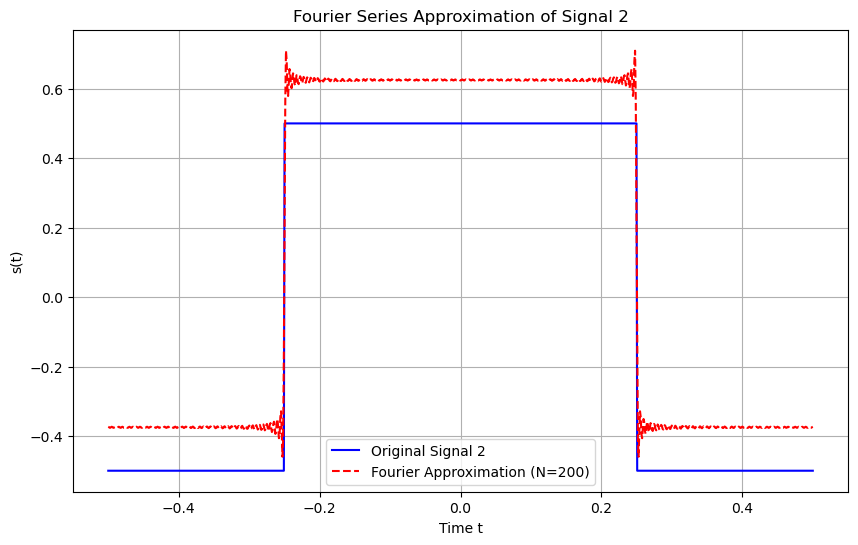

In [5]:
# write your code here
T0_2 = 1  
N = 200

t = np.linspace(-0.5, 0.5, 1000)

def rect_signal(t):
    return np.where(np.abs(t) < 0.25, 1, 0) - 0.5

def fourier_series_signal_2(t, N):
    a0 = 1 / 8
    signal = a0 * np.ones_like(t)  # Start with DC component
    for k in range(1, N + 1, 2):  # Only odd harmonics
        Ak = 2 * np.sin(np.pi * k / 2) / (np.pi * k)
        signal += Ak * np.cos(2 * np.pi * k * t)
    return signal

plt.figure(figsize=(10, 6))

plt.plot(t, rect_signal(t), label='Original Signal 2', color='blue')

approx_signal_2 = fourier_series_signal_2(t, N)
plt.plot(t, approx_signal_2, label=f'Fourier Approximation (N={N})', linestyle='--', color='red')

plt.title('Fourier Series Approximation of Signal 2')
plt.xlabel('Time t')
plt.ylabel('s(t)')
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

insert your plots here



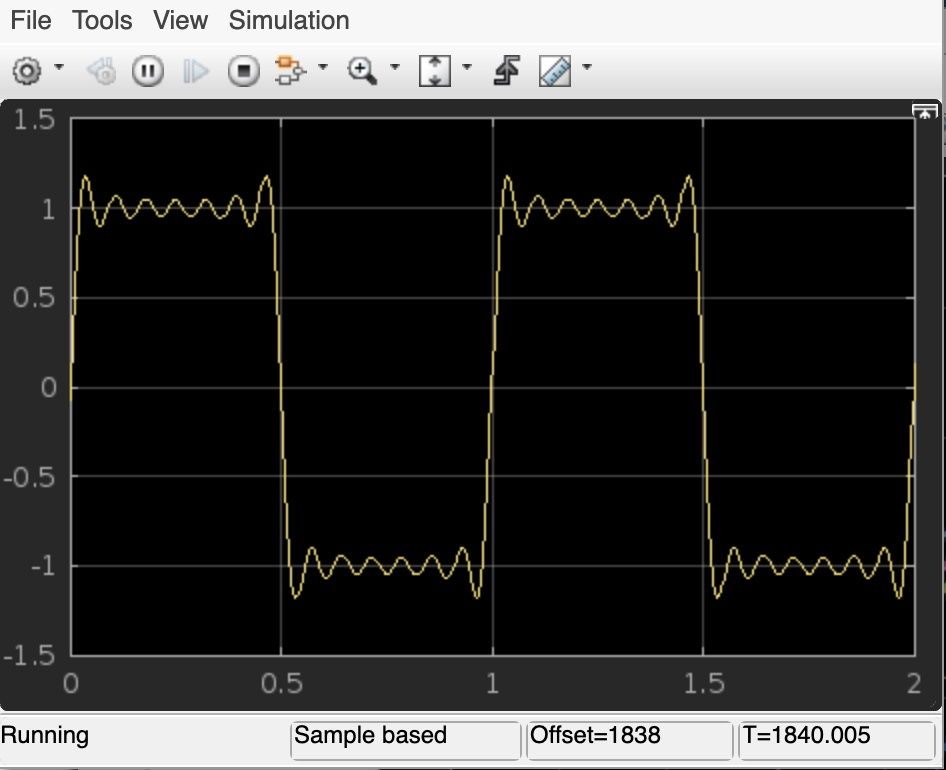

**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

insert your answer here

The big difference ins that the sythesized wave form has wave with the fact that it was fourier series.

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

insert your plots here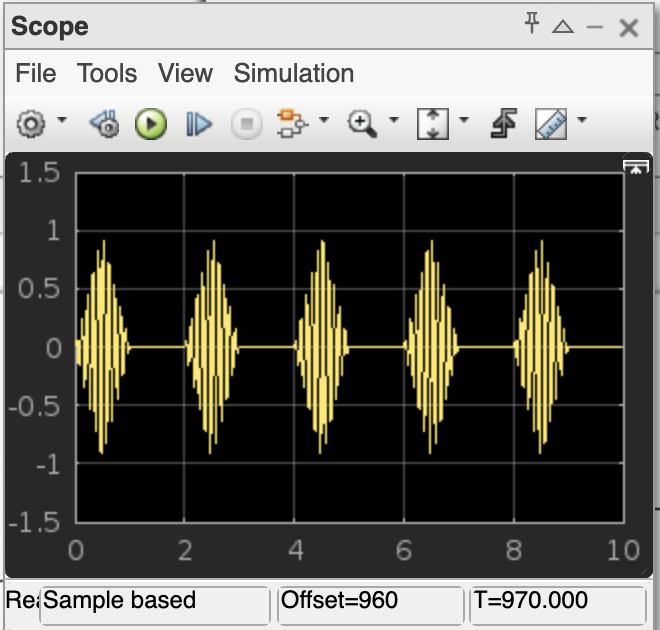

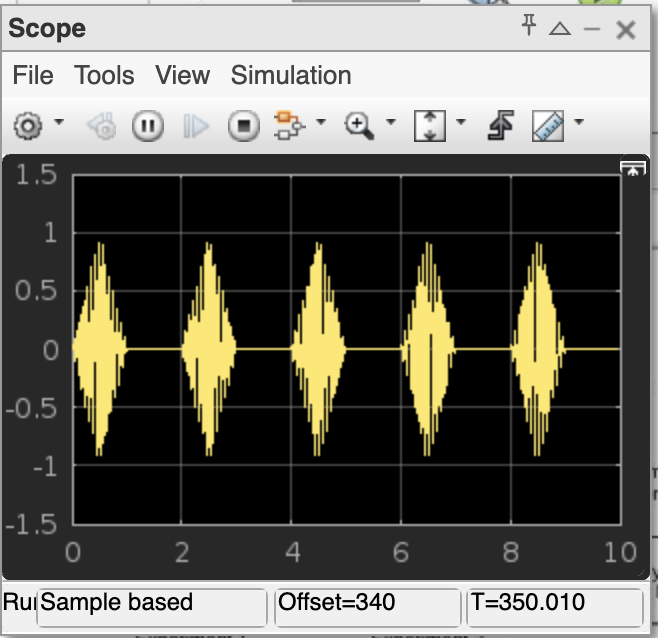
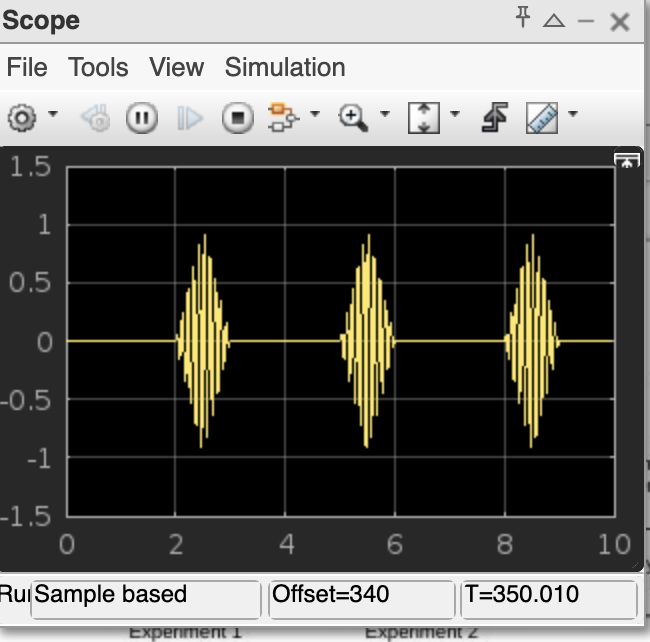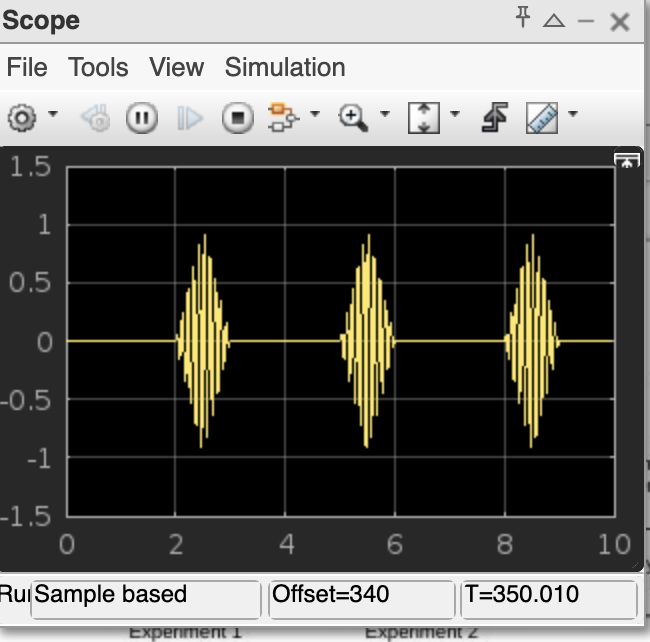
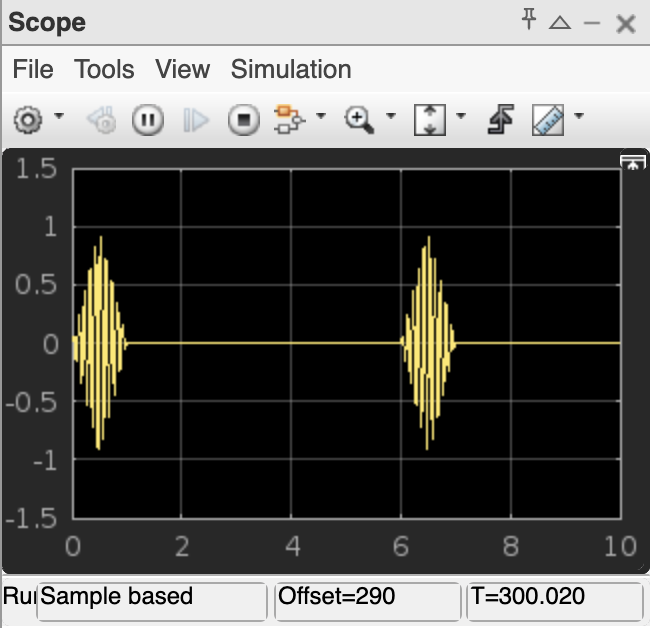

insert your plots here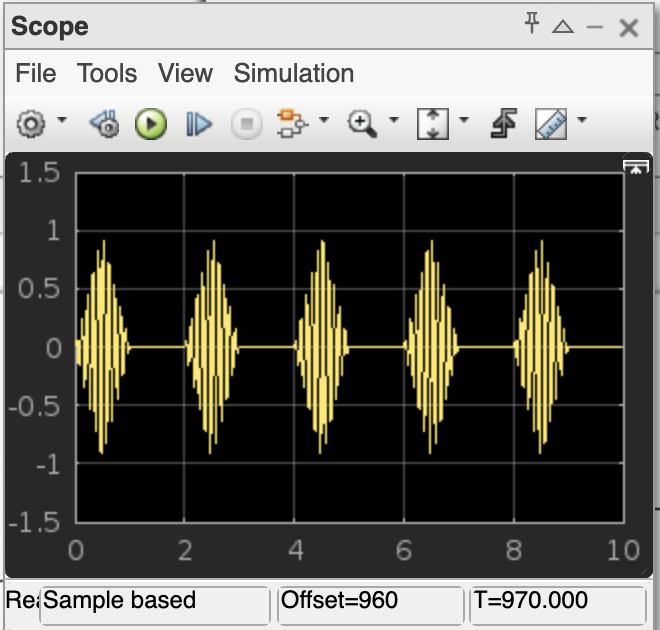

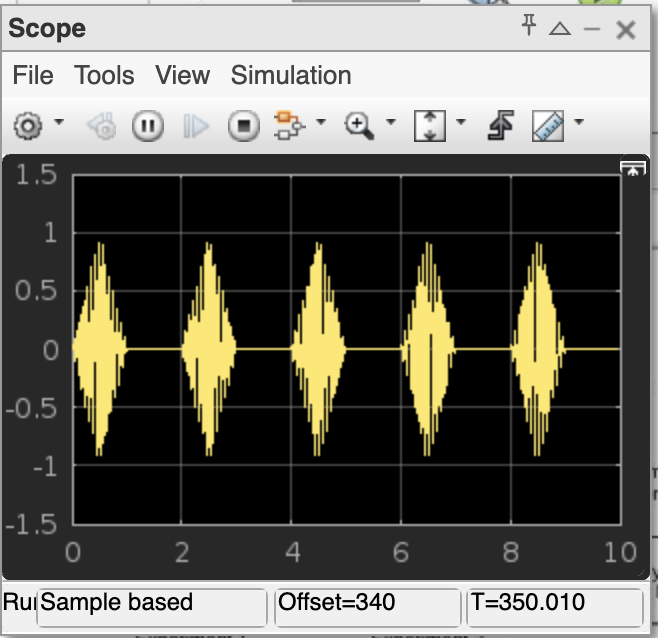
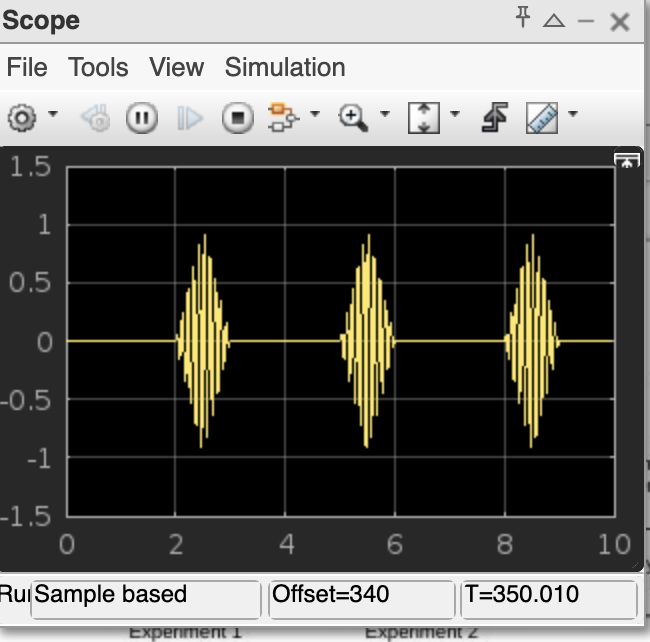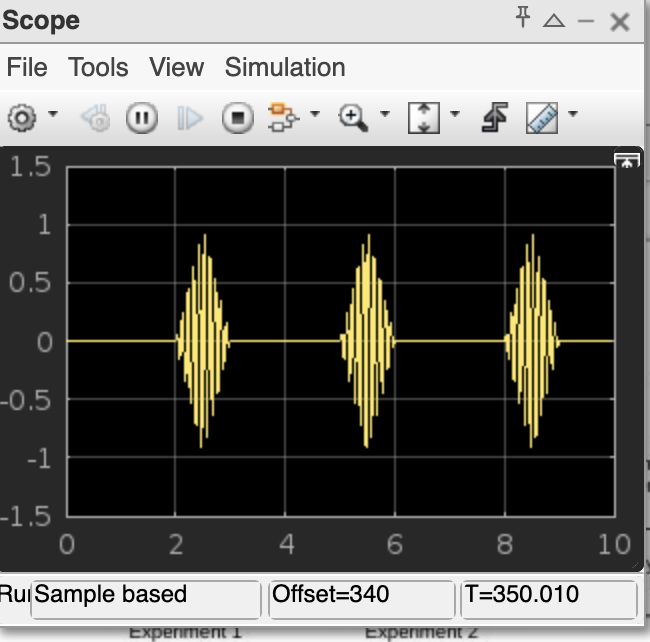
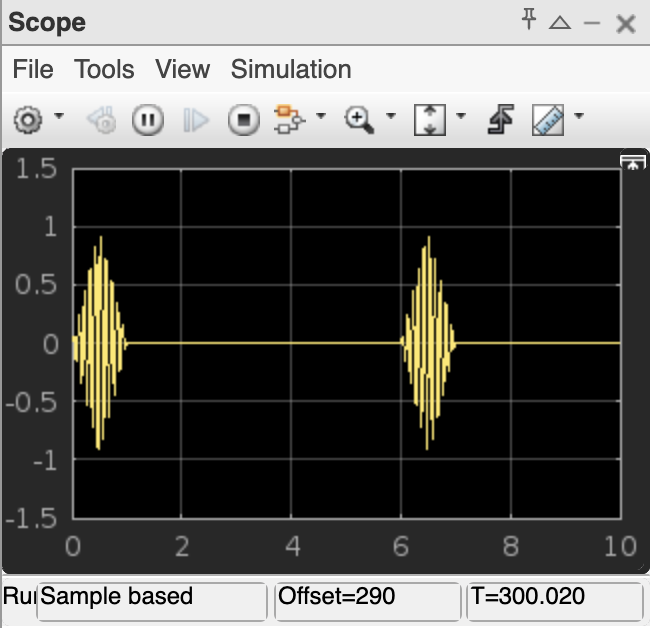

**2. What effect does changing the modulating frequency have on the spectral density?**

write your answer here

The big difference between the pictures is the density of the wave. The wave became more dense compared to the other waves.

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

write your answer here
The comb structure is due to the combonation of the sine wave and repeated strucutre. And then the spectral distance depends on the changed time scale.

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

write your answer here

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

insert your printout here
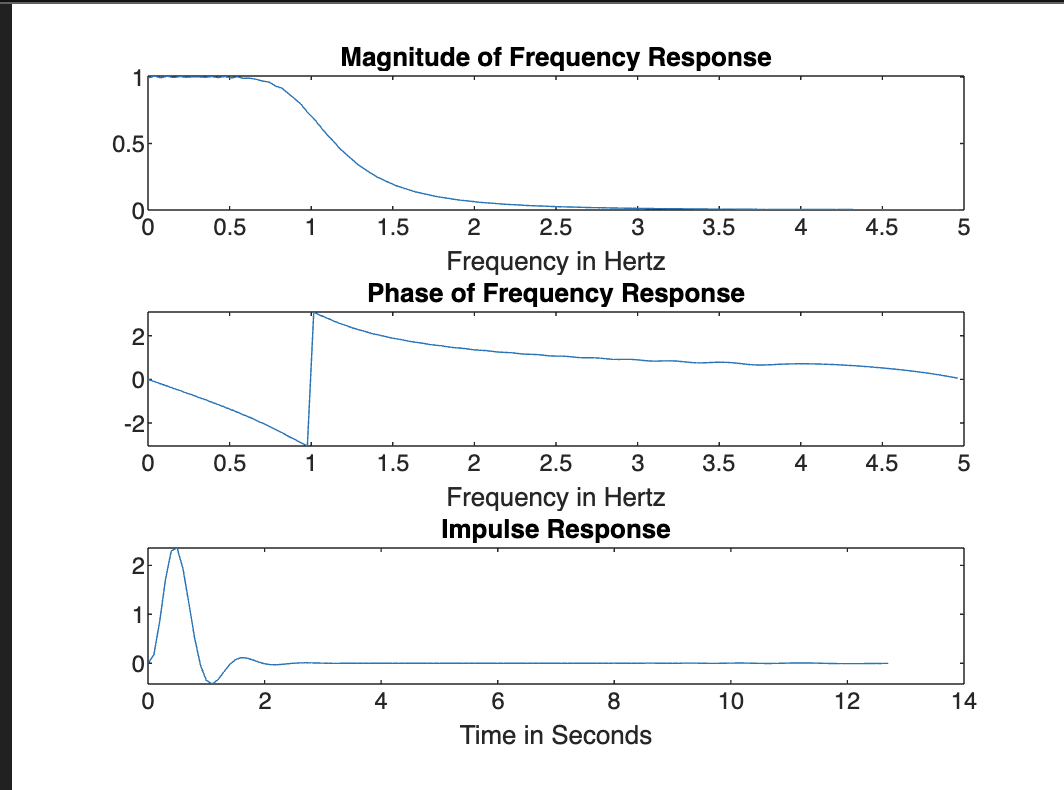


**2. Hand in the plot of the impulse response obtained using a unit step.**

insert your plot here

**3. What are the advantages and disadvantages of each method?**

write your answer here

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [6]:
# write your code here
def DTFT(x, n0, w):
    N = len(x)  
    X = np.zeros(len(w), dtype=complex)  

    for k in range(len(w)):
        X[k] = np.sum(x * np.exp(-1j * w[k] * (np.arange(N) + n0)))
    
    return X

**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

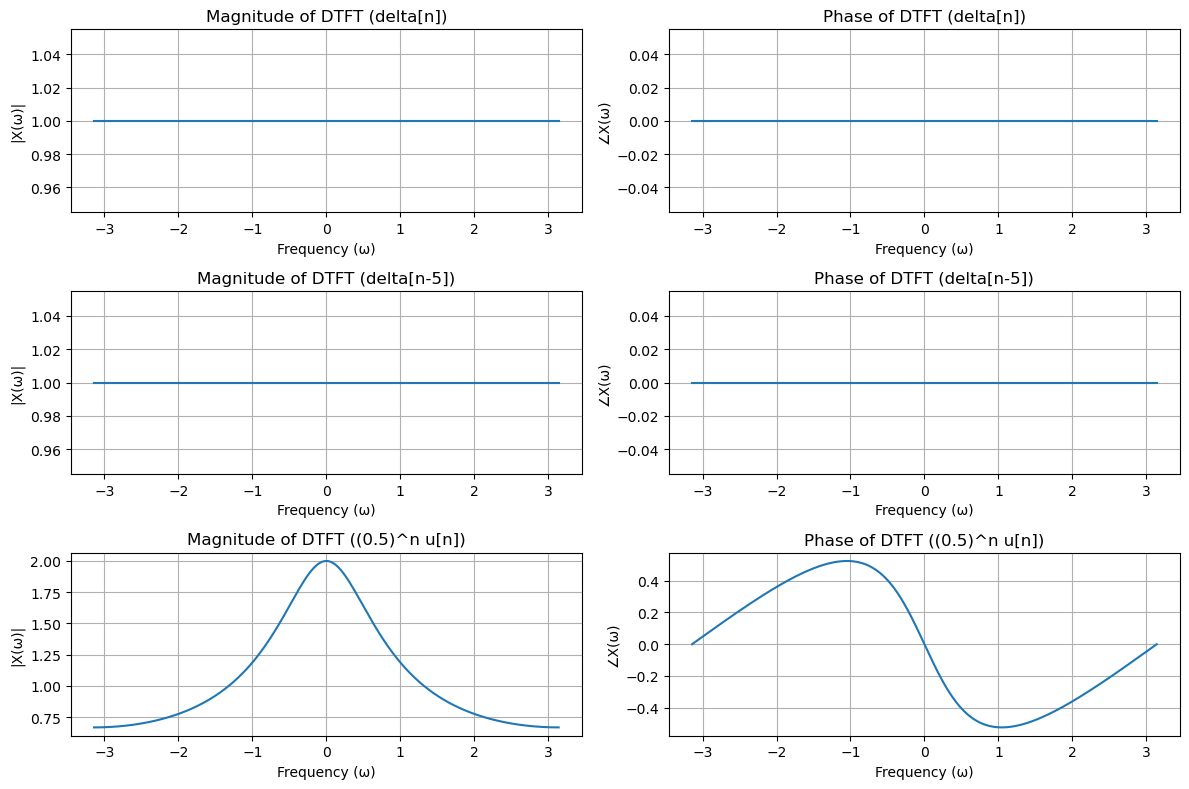

In [8]:
# write your code here
omega = np.linspace(-np.pi, np.pi, 1000)

# Signal 1
x1 = np.array([1] + [0]*99)  
n0_1 = 0
X1 = DTFT(x1, n0_1, omega)

# Signal 2
x2 = np.array([0]*5 + [1] + [0]*95)  
n0_2 = -5
X2 = DTFT(x2, n0_2, omega)

# Signal 3
N = 100  
n = np.arange(0, N)
x3 = np.power(0.5, n)  
n0_3 = 0
X3 = DTFT(x3, n0_3, omega)

plt.figure(figsize=(12, 8))

# Magnitude and Phase for x[n] = delta[n]
plt.subplot(3, 2, 1)
plt.plot(omega, np.abs(X1))
plt.title('Magnitude of DTFT (delta[n])')
plt.xlabel('Frequency (ω)')
plt.ylabel('|X(ω)|')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(omega, np.angle(X1))
plt.title('Phase of DTFT (delta[n])')
plt.xlabel('Frequency (ω)')
plt.ylabel('∠X(ω)')
plt.grid(True)

# Magnitude and Phase for x[n] = delta[n-5]
plt.subplot(3, 2, 3)
plt.plot(omega, np.abs(X2))
plt.title('Magnitude of DTFT (delta[n-5])')
plt.xlabel('Frequency (ω)')
plt.ylabel('|X(ω)|')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(omega, np.angle(X2))
plt.title('Phase of DTFT (delta[n-5])')
plt.xlabel('Frequency (ω)')
plt.ylabel('∠X(ω)')
plt.grid(True)

# Magnitude and Phase for x[n] = (0.5)^n u[n]
plt.subplot(3, 2, 5)
plt.plot(omega, np.abs(X3))
plt.title('Magnitude of DTFT ((0.5)^n u[n])')
plt.xlabel('Frequency (ω)')
plt.ylabel('|X(ω)|')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(omega, np.angle(X3))
plt.title('Phase of DTFT ((0.5)^n u[n])')
plt.xlabel('Frequency (ω)')
plt.ylabel('∠X(ω)')
plt.grid(True)

plt.tight_layout()
plt.show()

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

insert your diagram here

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

write your answer here

**3. Use your answer in Q2 to obtain the frequency response of the system.**

write your answer here

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

write your answer here

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

In [6]:
# write your code here


<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

insert your diagram here

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |              |                    |
|  $\pi/8$ |              |                    |
|  $\pi/4$ |              |                    |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

In [7]:
# write your code here
